In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [4]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY', 'sandbox')

In [5]:
type(PLAID_PUBLIC_KEY)

str

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [6]:
INSTITUTION_ID = "ins_109508"

In [7]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [8]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [9]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [10]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': '5lbDeLBL8PFz1z7blpZbtoaxqG1NpdiZdG411',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'JpxZl1q1XviLRLPexq4eUDVxApPMKjudJQKDL',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'klDd9J6JB3FBbBEQAgZQUeJxQENyRGhWpJGlV',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [11]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

In [12]:
transaction_response = client.Transactions.get(access_token,start_date,end_date)

### 2. Print the categories for each transaction

In [13]:
# YOUR CODE HERE
for transactions in transaction_response['transactions']:
    categories = transactions['category']
    print(json.dumps(f"Transaction category: {categories}", indent=4, sort_keys=True))

"Transaction category: ['Payment', 'Credit Card']"
"Transaction category: ['Travel', 'Taxi']"
"Transaction category: ['Transfer', 'Debit']"
"Transaction category: ['Transfer', 'Deposit']"
"Transaction category: ['Recreation', 'Gyms and Fitness Centers']"
"Transaction category: ['Travel', 'Airlines and Aviation Services']"
"Transaction category: ['Food and Drink', 'Restaurants', 'Fast Food']"
"Transaction category: ['Food and Drink', 'Restaurants', 'Coffee Shop']"
"Transaction category: ['Food and Drink', 'Restaurants']"
"Transaction category: ['Transfer', 'Credit']"
"Transaction category: ['Travel', 'Airlines and Aviation Services']"
"Transaction category: ['Travel', 'Taxi']"
"Transaction category: ['Food and Drink', 'Restaurants']"
"Transaction category: ['Payment']"
"Transaction category: ['Food and Drink', 'Restaurants', 'Fast Food']"
"Transaction category: ['Shops', 'Sporting Goods']"
"Transaction category: ['Payment', 'Credit Card']"
"Transaction category: ['Travel', 'Taxi']"
"Tra

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [14]:
# YOUR CODE HERE
transaction_data_df = pd.DataFrame()
transaction_data_df = pd.DataFrame(transaction_response['transactions'], columns=['date', 'name', 'amount', 'category'])
transaction_data_df['category']=transaction_data_df['category'].str[0]
transaction_data_df.head()


,date,name,amount,category
0,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
1,2020-04-15,Uber,5.4,Travel
2,2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.0,Transfer
3,2020-04-14,CD DEPOSIT .INITIAL.,1000.0,Transfer
4,2020-04-13,Touchstone Climbing,78.5,Recreation


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [15]:
# YOUR CODE HERE
transaction_data_df['date'] = pd.to_datetime(transaction_data_df['date'],infer_datetime_format=True)
transaction_data_df.set_index('date', inplace=True)
transaction_data_df['amount'].astype(float)
#transaction_data_df.index = transaction_data_df.index.date
transaction_data_df

,name,amount,category
date,,,
2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
2020-04-15,Uber,5.40,Travel
2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
2020-04-14,CD DEPOSIT .INITIAL.,1000.00,Transfer
2020-04-13,Touchstone Climbing,78.50,Recreation
2020-04-13,United Airlines,-500.00,Travel
2020-04-12,McDonald's,12.00,Food and Drink
2020-04-12,Starbucks,4.33,Food and Drink
2020-04-11,SparkFun,89.40,Food and Drink


In [16]:
transaction_data_df.dtypes

name         object
amount      float64
category     object
dtype: object

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [24]:
# YOUR CODE HERE
income_response = client.Income.get(access_token)
print(json.dumps(income_response, indent=4))

{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 720,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "TidP4q8wl4S3fcB"
}


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [18]:
# YOUR CODE HERE
transaction_data_df.groupby('category').sum()

,amount
category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DB8CB7F88>],
      dtype=object)

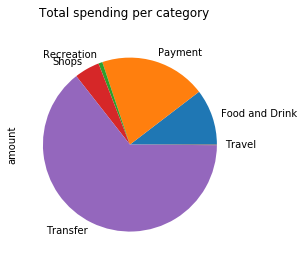

In [19]:
plot_title='Total spending per category'
transaction_data_df.groupby('category').sum().plot(kind='pie', subplots=True, title=plot_title, legend=False)

In [20]:
transaction_data_df.groupby(transaction_data_df['category'])['name'].count()

category
Food and Drink    15
Payment            6
Recreation         3
Shops              3
Transfer           9
Travel            12
Name: name, dtype: int64

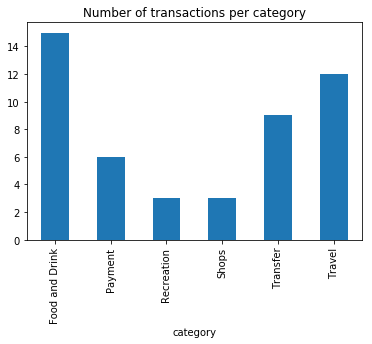

In [21]:
plot_title='Number of transactions per category'
transaction_data_df.groupby(transaction_data_df['category'])['name'].count().plot(kind='bar', title=plot_title, legend=False)

### Calculate the expenses per month

In [22]:
# YOUR CODE HERE
#transaction_data_df_monthly = transaction_data_df.set_index(pd.to_datetime(transaction_data_df['date'], infer_datetime_format=True), inplace=True)
transaction_data_df_monthly = transaction_data_df.groupby(by=[transaction_data_df.index.month]).sum() #pd.Grouper(freq="M"))
transaction_data_df_monthly
#transaction_data_df.groupby(transaction_data_df['data'].dt.strftime('%B'))['Revenue'].sum().sort_values()


,amount
date,
1,4084.83
2,10145.24
3,11145.24
4,6560.41


Text(0.5, 0, 'month')

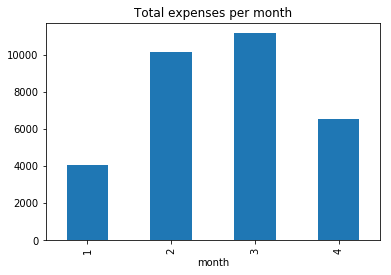

In [23]:
plot_title='Total expenses per month'
#transaction_data_df_monthly.sum().plot(kind='bar', title=plot_title, legend=False)

transaction_data_df_monthly_plot = transaction_data_df_monthly.plot(kind='bar', title=plot_title, legend=False)
transaction_data_df_monthly_plot.set_xlabel('month')

# transaction_data_df_monthly.groupby([transaction_data_df_monthly['date'].dt.month_name()], sort=False).plot(kind='bar')
# print(transaction_data_df.groupby([transaction_data_df['date'].dt.month_name()], sort=False))

# def line_format(label):
#     month = label.month_name()[:3]
#     if month == 'Jan':
#         month += f'\n{label.year}'
#     return month

# ax = transaction_data_df_monthly.plot(kind='bar', figsize=(12, 8), color='#2ecc71', rot=15)
# ax.set_xticklabels(map(lambda x: line_format(x), transaction_data_df_monthly.index))
# transaction_data_df.set_index('date', inplace=True, drop=False)

# print(transaction_data_df.groupby([transaction_data_df['date'].dt.month_name()], sort=False))